# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash;  30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов


-----

In [ ]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm



## Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за лекгкую часть задания 3 и 5 весной 2023.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [ ]:
from google.colab import files
uploaded = files.upload()

import io
targetColumns = ["Задание 3", "Задание 5"]
data = pd.read_csv(io.BytesIO(uploaded['Успеваемость ph@ds, весна 2023 - Домашние задания.csv']))[targetColumns].drop([0])
data.head()

Saving Успеваемость ph@ds, весна 2023 - Домашние задания.csv to Успеваемость ph@ds, весна 2023 - Домашние задания (2).csv


,Задание 3,Задание 5
1,85,85
2,74,85
3,0,0
4,72,0
5,50,27


In [ ]:
data.head()

,Задание 3,Задание 5
1,85.0,85.0
2,74.0,85.0
3,0.0,0.0
4,72.0,0.0
5,50.0,27.0


0.03609138048305918

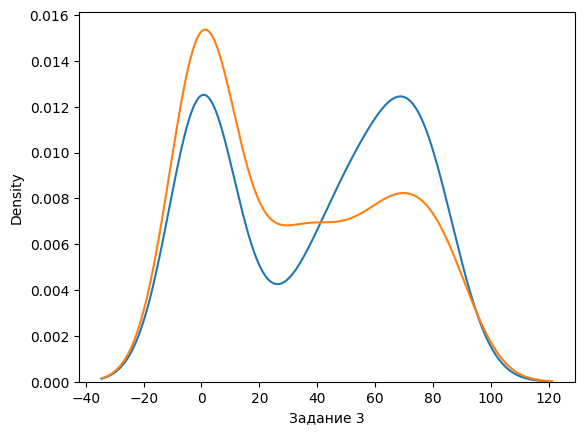

In [ ]:
for column_name in targetColumns:
  sns.kdeplot(data[column_name])

In [ ]:
t_stat, p_val = sps.ttest_ind(data[targetColumns[0]], data[targetColumns[1]],equal_var = False)

p_val

0.03609138048305918

Сделайте общий вывод по задаче.

**Вывод:** Гипотеза отвергнута, средние оценки отличаются за 3 и 5 задание(p_val < 0.05)



## Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

Проверим на результатах контрольной по вакуумной электронике 2022


In [ ]:
uploaded = files.upload()


Saving Результаты контрольной работы.xlsx to Результаты контрольной работы (5).xlsx


In [ ]:
data = pd.read_excel(io.BytesIO(uploaded['Результаты контрольной работы.xlsx']))
data.head()

,,ФИО,№1,№2,№3,№4,Сумма,Группа
0,NaN,Алямовская Анна Андреевна,0.0,3.0,4.0,1.0,8.0,Б04-104
1,NaN,Артамонова Ярослава Константиновна,4.0,0.0,5.0,0.0,9.0,Б04-104
2,NaN,Буланов Михаил Сергеевич,1.0,4.0,3.0,0.0,8.0,Б04-104
3,NaN,Гасанов Артем Джамалутдинович,0.0,1.0,2.0,2.0,5.0,Б04-104
4,NaN,Казаринов Алексей Дмитриевич,0.0,2.0,1.0,0.0,3.0,Б04-104


In [ ]:
groupMeans = data.groupby('Группа').mean()
groupMeans

,,№1,№2,№3,№4,Сумма
Группа,,,,,,
Б04-104,NaN,2.571429,1.857143,3.142857,0.285714,7.857143
Б04-105,NaN,4.727273,2.363636,0.818182,1.272727,9.181818
Б04-106,NaN,4.600000,4.100000,4.400000,0.700000,13.800000
Б04-107,NaN,4.000000,2.777778,2.666667,0.444444,9.888889
Б04-108,NaN,5.928571,2.285714,3.714286,2.285714,14.214286


In [ ]:
groups = data['Группа'].unique()
groups

groups = np.delete(groups,1)
groups

array(['Б04-104', 'Б04-105', 'Б04-106', 'Б04-107\xa0', 'Б04-108\xa0'],
      dtype=object)

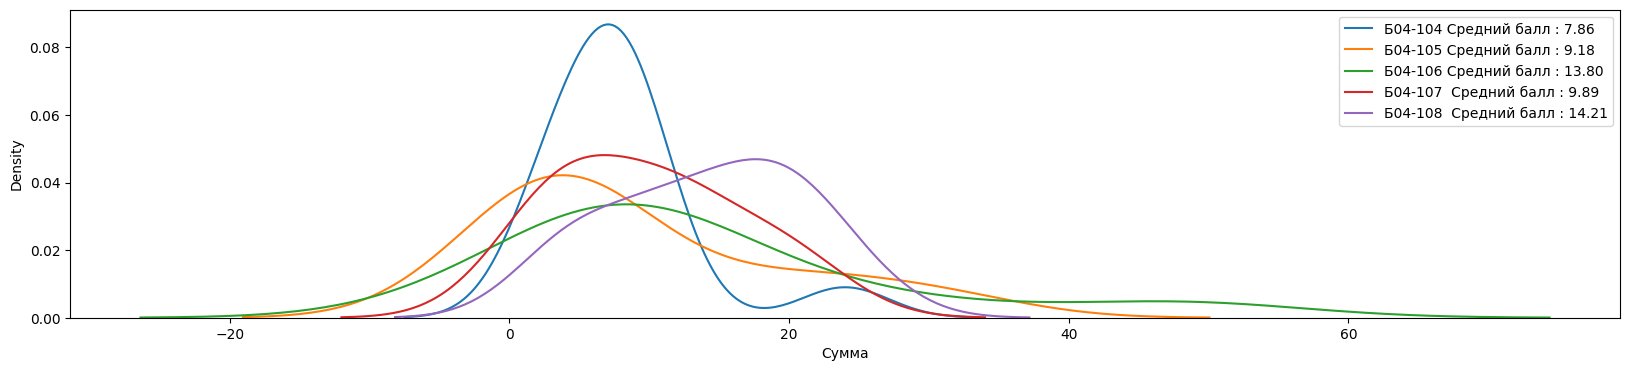

In [ ]:
plt.figure(figsize = (20, 4))
for it, group in enumerate (groups):
  mean = groupMeans['Сумма'][it]
  sns.kdeplot(data[data['Группа'] == group]['Сумма'], label = str(group) + f' Средний балл : {mean:.2f}')
plt.legend()

H0 - гипотеза, что средняя оценка за контрольную у группы Б04-105  и Б04-107 одинакова
H1 - среднии оценки не равны



In [ ]:
sps.ttest_ind(data[data['Группа'] == 'Б04-105']['Сумма'],data[data['Группа'] == 'Б04-107\xa0']['Сумма'],equal_var = False)

Ttest_indResult(statistic=-0.18493087365828048, pvalue=0.42771673386553427)

**Вывод:** Заметим, что p_value > 0.05 - означает, что гипотеза отвергнута
Это значит , что у группы Б04-105 и Б04-106 разные средние оценки за контрольную





## Задача 3

#### Профиль биология


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [ ]:
path = <...>
data = pd.read_csv(path)
data.head()

Выведем описательные статистики по вещественным параметрам.

In [ ]:
data.describe()

Количество записей по генотипам:

In [ ]:
data.Genotype.value_counts()

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`.

In [ ]:
<...>

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).

In [ ]:
<...>


##### 1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу.

Сделайте выводы.

In [ ]:
<...>

**Вывод**

Посчитайте реализацию доверительного интервала величины сдвига.


In [ ]:
<...>

##### 2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы.

In [ ]:
<...>

**Вывод:** <...>

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:**<...>

#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [ ]:
uploaded = files.upload()


Saving pid-5M.csv to pid-5M.csv


In [ ]:
path = 'pid-5M.csv'
data =  pd.read_csv(io.BytesIO(uploaded[path]))
targetColumns = ['p', 'theta', 'beta', 'nphe', 'ein', 'eout']
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [ ]:
particle_types = data['id'].unique()
particle_types

array([ 211, 2212,  321,  -11])

Постройте гистограммы признаков для каждого вида частиц.

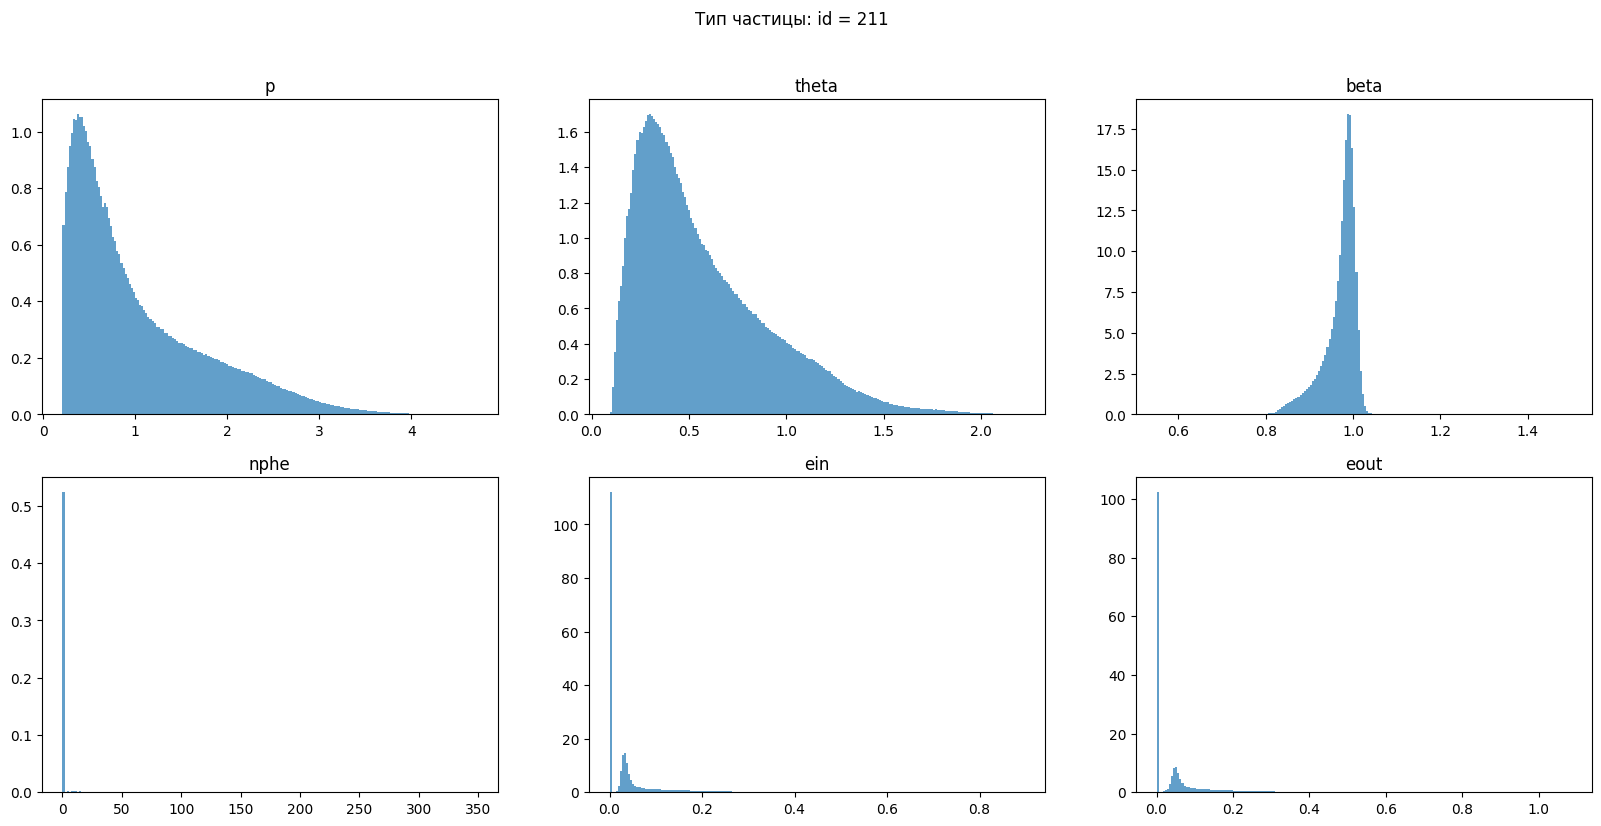

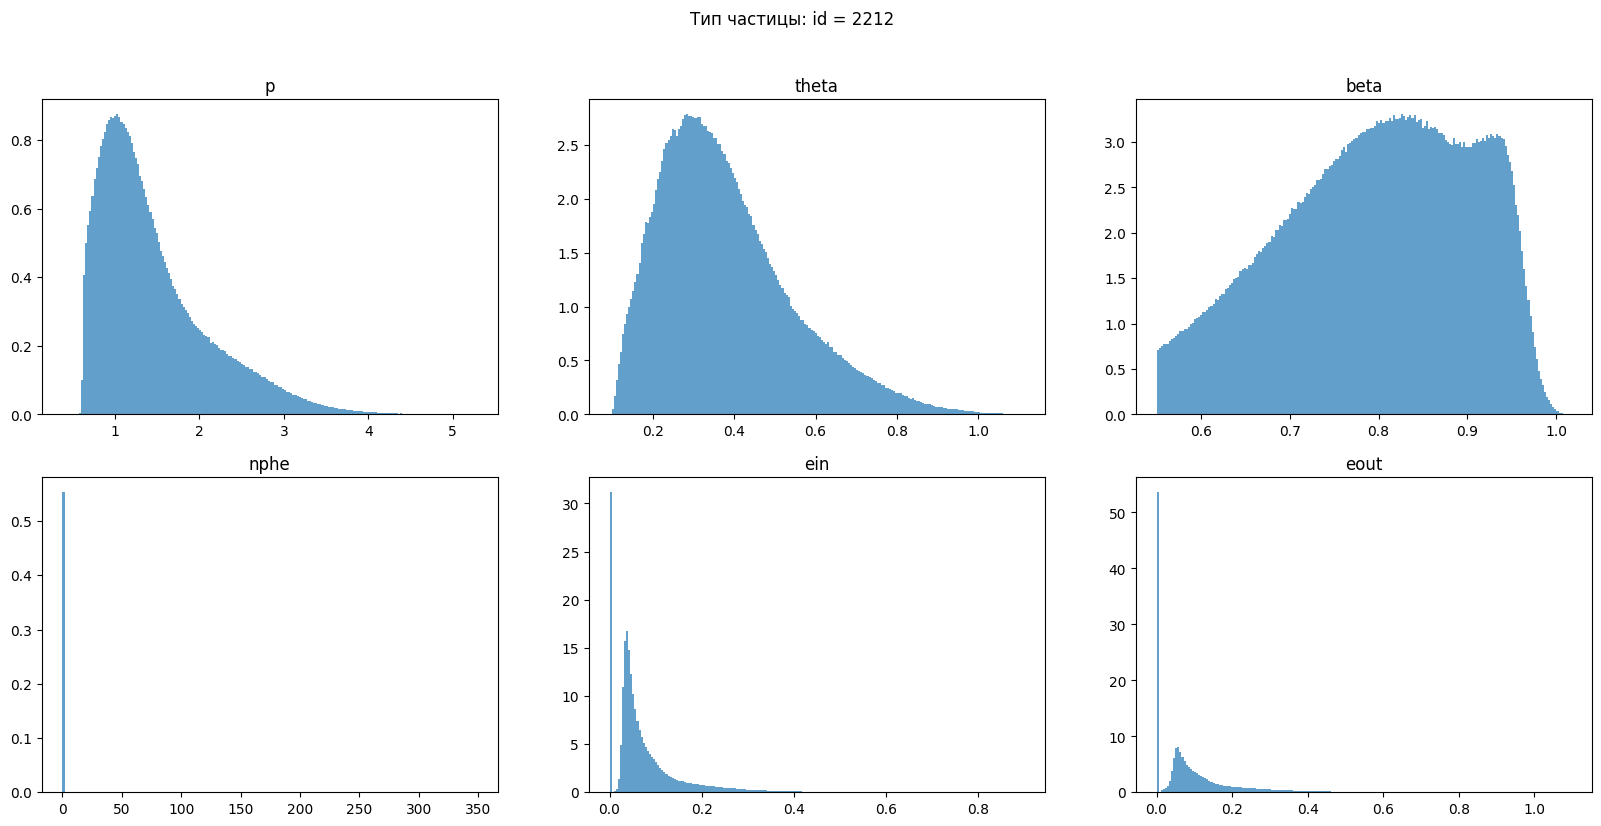

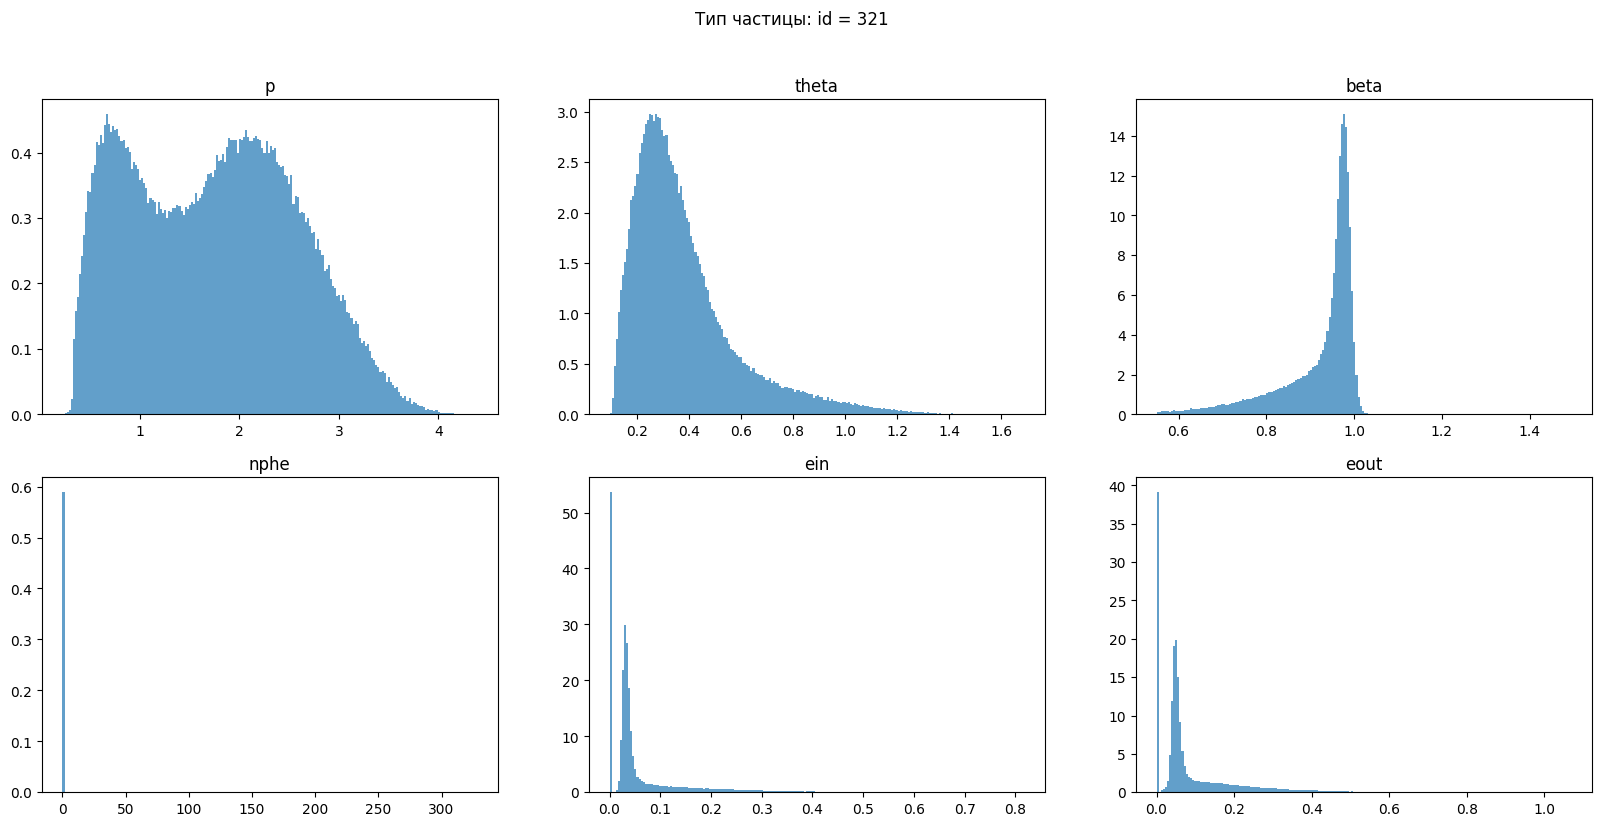

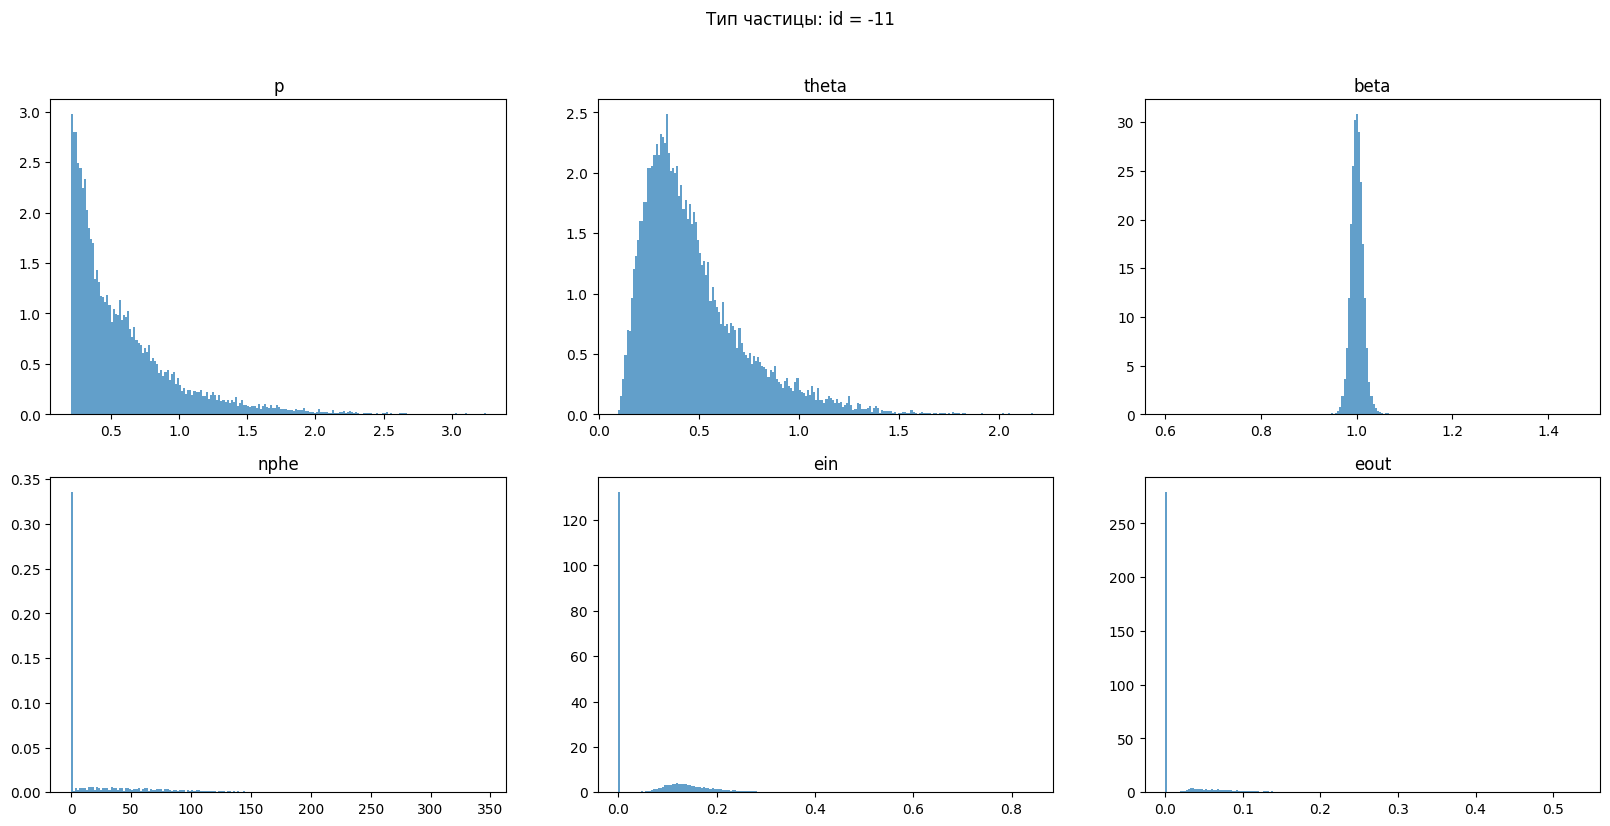

In [ ]:
for type in particle_types:
    fig, ax = plt.subplots(2, 3, figsize = (20,9))
    fig.suptitle(f'Тип частицы: id = {type}')
    for ind, (label, column) in enumerate(data[data.id == type][targetColumns].items()):
        indX, indY = ind//3, ind%3
        mean, median = column.mean(), column.median()
        ax[indX, indY].hist(column, bins = 200,density = True, alpha = 0.7, label = 'Распределение')
        ax[indX, indY].set_title(label)

Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [ ]:
groupMeans = data.groupby('id').mean()
groupMeans

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.591886,0.471277,1.001011,26.177948,0.068000,0.021495
211,1.035184,0.574035,0.968695,4.636706,0.042600,0.052250
321,1.744734,0.381561,0.921961,2.001605,0.060969,0.088638
2212,1.454526,0.379136,0.796434,2.059655,0.075566,0.094600


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


Для частицы 211 и 321 для признака beta проверим гипотезу о равенстве средних.
Для частицы 2212 и 321 для признака theta проверим гипотезу о равенстве средних


In [ ]:
sps.ttest_ind(data[data['id'] == 211]['beta'],data[data['id'] == 321]['beta'],equal_var = False)

Ttest_indResult(statistic=251.019789585461, pvalue=0.0)

In [ ]:
sps.ttest_ind(data[data['id'] == 2212]['theta'],data[data['id'] == 321]['theta'],equal_var = False)

Ttest_indResult(statistic=-5.482377295331929, pvalue=4.2002442932406294e-08)

**Ответ:** В обоих случаях гипотеза отвергается, для случая с признаком theta имеем сильную уверенность в отвержении


Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** Для частиц и признаков, которые я взял - легче по theta и cложнее по beta(мог бы проверить больше, но дедлайн в 16 00, а пишу в 15:45)


Студенты профиля **химия** могут решать любую из задач.

## Задача 4
Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера.

Выведите сходимость статистики:
- абсолютного t-test'а с помощью дельта-метода
- относительного t-test'а с помощью дельта-метода